### Data Merging

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read data

In [4]:
file_path18 = r"datasets\QS_2018.csv"
file_path19 = r"datasets\QS_2019.csv"
file_path20 = r"datasets\QS_2020.csv"
file_path21 = r"datasets\QS_2021.csv"
file_path22 = r"datasets\QS_2022.csv"
file_path23 = r"datasets\QS_2023.csv"
file_path24 = r"datasets\QS_2024.csv"
file_path25 = r"datasets\QS_2025.csv"
file_path26 = r"datasets\QS_2026.csv"
df18 = pd.read_csv(file_path18, encoding='latin1')
df19 = pd.read_csv(file_path19, encoding='latin1')
df20 = pd.read_csv(file_path20, encoding='latin1')
df21 = pd.read_csv(file_path21, encoding='latin1')
df22 = pd.read_csv(file_path22, encoding='latin1')
df23 = pd.read_csv(file_path23, encoding='latin1')
df24 = pd.read_csv(file_path24, encoding='latin1')
df25 = pd.read_csv(file_path25, encoding='latin1')
df26 = pd.read_csv(file_path26, encoding='latin1')

In [5]:
df = pd.concat([df18, df19, df20, df21, df22, df23, df24, df25, df26])
df.reset_index(drop=True, inplace=True)

In [6]:
df.head()

,Rank,Institution Name,Country,Year,Classification_SIZE,Classification_FOCUS,Research Intensity,Age,Status,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall,International Research Network,Employment Outcomes,Sustainability
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,2018,M,CO,VH,5.0,B,100,100,100,99.9,100,96.1,100,NaN,NaN,NaN
1,2,STANFORD UNIVERSITY,United States,2018,L,FC,VH,5.0,B,100,100,100,99.4,99.6,72.7,98.7,NaN,NaN,NaN
2,3,HARVARD UNIVERSITY,United States,2018,L,FC,VH,5.0,B,100,100,98.3,99.9,96.5,75.2,98.4,NaN,NaN,NaN
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,2018,S,CO,VH,5.0,B,99.5,85.4,100,100,93.4,89.2,97.7,NaN,NaN,NaN
4,5,UNIVERSITY OF CAMBRIDGE,United Kingdom,2018,L,FC,VH,5.0,A,100,100,100,78.3,97.4,97.7,95.6,NaN,NaN,NaN


#### Data Cleaning

In [7]:
# clean '=' and '+'
df['Rank'] = df['Rank'].str.replace("=", "", regex=False)
df['Rank'] = df['Rank'].str.replace("+", "", regex=False)

# replace '-' and empty by NaN
df.replace("-", np.nan, inplace=True)
df.replace("", np.nan, inplace=True)
df = df.rename(columns = {'Classification_SIZE':'CS',
                          'Classification_FOCUS':'CF',
                          'Research Intensity':'RI',
                          'Status':'STA',
                          'Academic Reputation':'AR_SCORE', 
                          'Employer Reputation':'ER_SCORE', 
                          'Faculty Student':'FS_SCORE', 
                          'Citations per Faculty':'CPF_SCORE', 
                          'International Faculty':'IF_SCORE', 
                          'International Students':'IS_SCORE',
                          'International Research Network':'IRN_SCORE',
                          'Employment Outcomes':'EO_SCORE',
                          'Sustainability':'S_SCORE'})

In [8]:
df['CS'] = df['CS'].map({'S': 1, 'M': 2, 'L': 3, 'XL': 4})
df['CF'] = df['CF'].map({'SP': 1, 'CO': 2, 'FC': 3, 'FO': 4})
df['RI'] = df['RI'].map({'VH': 4, 'HI': 3, 'MD': 2, 'LO': 1})
df['STA'] = df['STA'].map({'A': 3, 'B': 2, 'C': 3})
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [9]:
# ranking cleaner
def cleaned_ranking(deger):
    if isinstance(deger, str):
        if "=" in deger:
            return int(deger.replace("=", "").strip())
        elif "-" in deger:   # replace 401-450 by 401
            first, last = map(int, deger.split("-"))
            return first
        else:
            return int(deger)
    return deger

In [10]:
df["Rank"] = df["Rank"].apply(cleaned_ranking)
df = df.dropna(subset=["Rank"])

In [11]:
# Set which columns to keep as string
string_cols = [
    'Institution Name', 'Country'
]
# Set all remain columns to be float type
for col in df.columns:
    if col not in string_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
score_columns = [col for col in df.columns if 'SCORE' in col] + ['Overall']
print(score_columns)

['AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CPF_SCORE', 'IF_SCORE', 'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_SCORE', 'Overall']


In [13]:
# replace all invalid score data to NaN
for col in score_columns:
    df.loc[df[col] > 100, col] = np.nan

# clean invalid data that all score are NaN
df = df.dropna(thresh=df.shape[1] - 10)
df.reset_index(drop=True, inplace=True)

In [14]:
# rearrange column position of Overall
cols = list(df.columns)
df = df[cols[0:15] + cols[16:] + [cols[15]]]

In [15]:
cols = df.columns
print("Columns in new data:")
print(cols)

Columns in new data:
Index(['Rank', 'Institution Name', 'Country', 'Year', 'CS', 'CF', 'RI', 'Age',
       'STA', 'AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CPF_SCORE', 'IF_SCORE',
       'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_SCORE', 'Overall'],
      dtype='object')


In [16]:
print("new data shape:", df.shape)

new data shape: (10621, 19)


In [17]:
df.tail()

,Rank,Institution Name,Country,Year,CS,CF,RI,Age,STA,AR_SCORE,ER_SCORE,FS_SCORE,CPF_SCORE,IF_SCORE,IS_SCORE,IRN_SCORE,EO_SCORE,S_SCORE,Overall
10616,1401.0,University of West Bohemia,Czechia,2026,2.0,2.0,4.0,NaN,NaN,7.2,5.3,12.5,7.9,NaN,6.2,40.9,15.5,19.5,NaN
10617,1401.0,Voronezh State University,Russian Federation,2026,3.0,2.0,3.0,NaN,NaN,5.7,4.7,31.3,1.6,3.7,34.5,12.2,3.5,20.4,NaN
10618,1401.0,Walailak University,Thailand,2026,3.0,3.0,2.0,NaN,NaN,8.3,2.7,12.5,5.6,13.9,3.0,31.5,3.2,43.0,NaN
10619,1401.0,Yamaguchi University,Japan,2026,2.0,3.0,3.0,NaN,NaN,4.4,2.9,46.1,8.2,8.0,4.5,15.4,1.7,22.5,NaN
10620,1401.0,Youngsan University,Republic of Korea,2026,2.0,1.0,2.0,NaN,NaN,6.5,11.9,25.6,2.0,3.5,25.3,2.5,1.9,11.5,NaN


In [18]:
df.describe()

,Rank,Year,CS,CF,RI,Age,STA,AR_SCORE,ER_SCORE,FS_SCORE,CPF_SCORE,IF_SCORE,IS_SCORE,IRN_SCORE,EO_SCORE,S_SCORE,Overall
count,10621.000000,10621.000000,10115.000000,10111.000000,10040.000000,5614.000000,8524.000000,9274.000000,9333.000000,9608.000000,9537.000000,9083.000000,9338.000000,5884.000000,5888.000000,4359.000000,4907.000000
mean,603.673100,2022.535449,2.895304,2.782514,3.542530,4.136088,2.835523,26.024132,26.376535,35.127800,30.283202,36.237565,32.205976,44.315993,25.008832,33.793003,44.259670
std,365.748811,2.571499,0.827411,0.806915,0.699767,0.942119,0.370729,25.420855,26.552541,29.473351,29.523602,35.534088,32.041058,32.084436,26.232799,30.765843,18.844524
min,1.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.800000
25%,295.000000,2020.000000,2.000000,2.000000,3.000000,4.000000,3.000000,7.600000,6.200000,10.500000,4.700000,5.400000,4.800000,13.100000,6.600000,2.800000,29.200000
50%,601.000000,2023.000000,3.000000,3.000000,4.000000,4.000000,3.000000,16.200000,15.900000,25.500000,20.000000,20.500000,19.600000,42.350000,13.600000,28.600000,38.300000
75%,801.000000,2025.000000,3.000000,3.000000,4.000000,5.000000,3.000000,34.600000,37.900000,54.900000,49.500000,66.950000,53.100000,74.100000,33.700000,57.650000,54.600000
max,1401.000000,2026.000000,4.000000,4.000000,4.000000,5.000000,3.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [19]:
df.to_csv('datasets\cleaned_data_QS.csv',index = False)

### Data Visualization

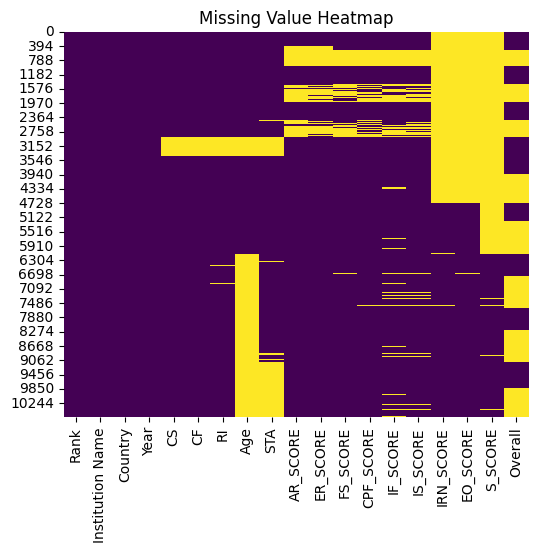

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [21]:
missing = df[df.columns].isnull().sum().values / df.shape[0]   # Calculate missing values ratio
for i,column in zip(missing, df.columns):
    print(f"{i * 100:.2f}% missing in",column)

0.00% missing in Rank
0.00% missing in Institution Name
0.00% missing in Country
0.00% missing in Year
4.76% missing in CS
4.80% missing in CF
5.47% missing in RI
47.14% missing in Age
19.74% missing in STA
12.68% missing in AR_SCORE
12.13% missing in ER_SCORE
9.54% missing in FS_SCORE
10.21% missing in CPF_SCORE
14.48% missing in IF_SCORE
12.08% missing in IS_SCORE
44.60% missing in IRN_SCORE
44.56% missing in EO_SCORE
58.96% missing in S_SCORE
53.80% missing in Overall


In [22]:
df.columns

Index(['Rank', 'Institution Name', 'Country', 'Year', 'CS', 'CF', 'RI', 'Age',
       'STA', 'AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CPF_SCORE', 'IF_SCORE',
       'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_SCORE', 'Overall'],
      dtype='object')

C:\Users\57176\AppData\Local\Temp\ipykernel_18988\3093028157.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


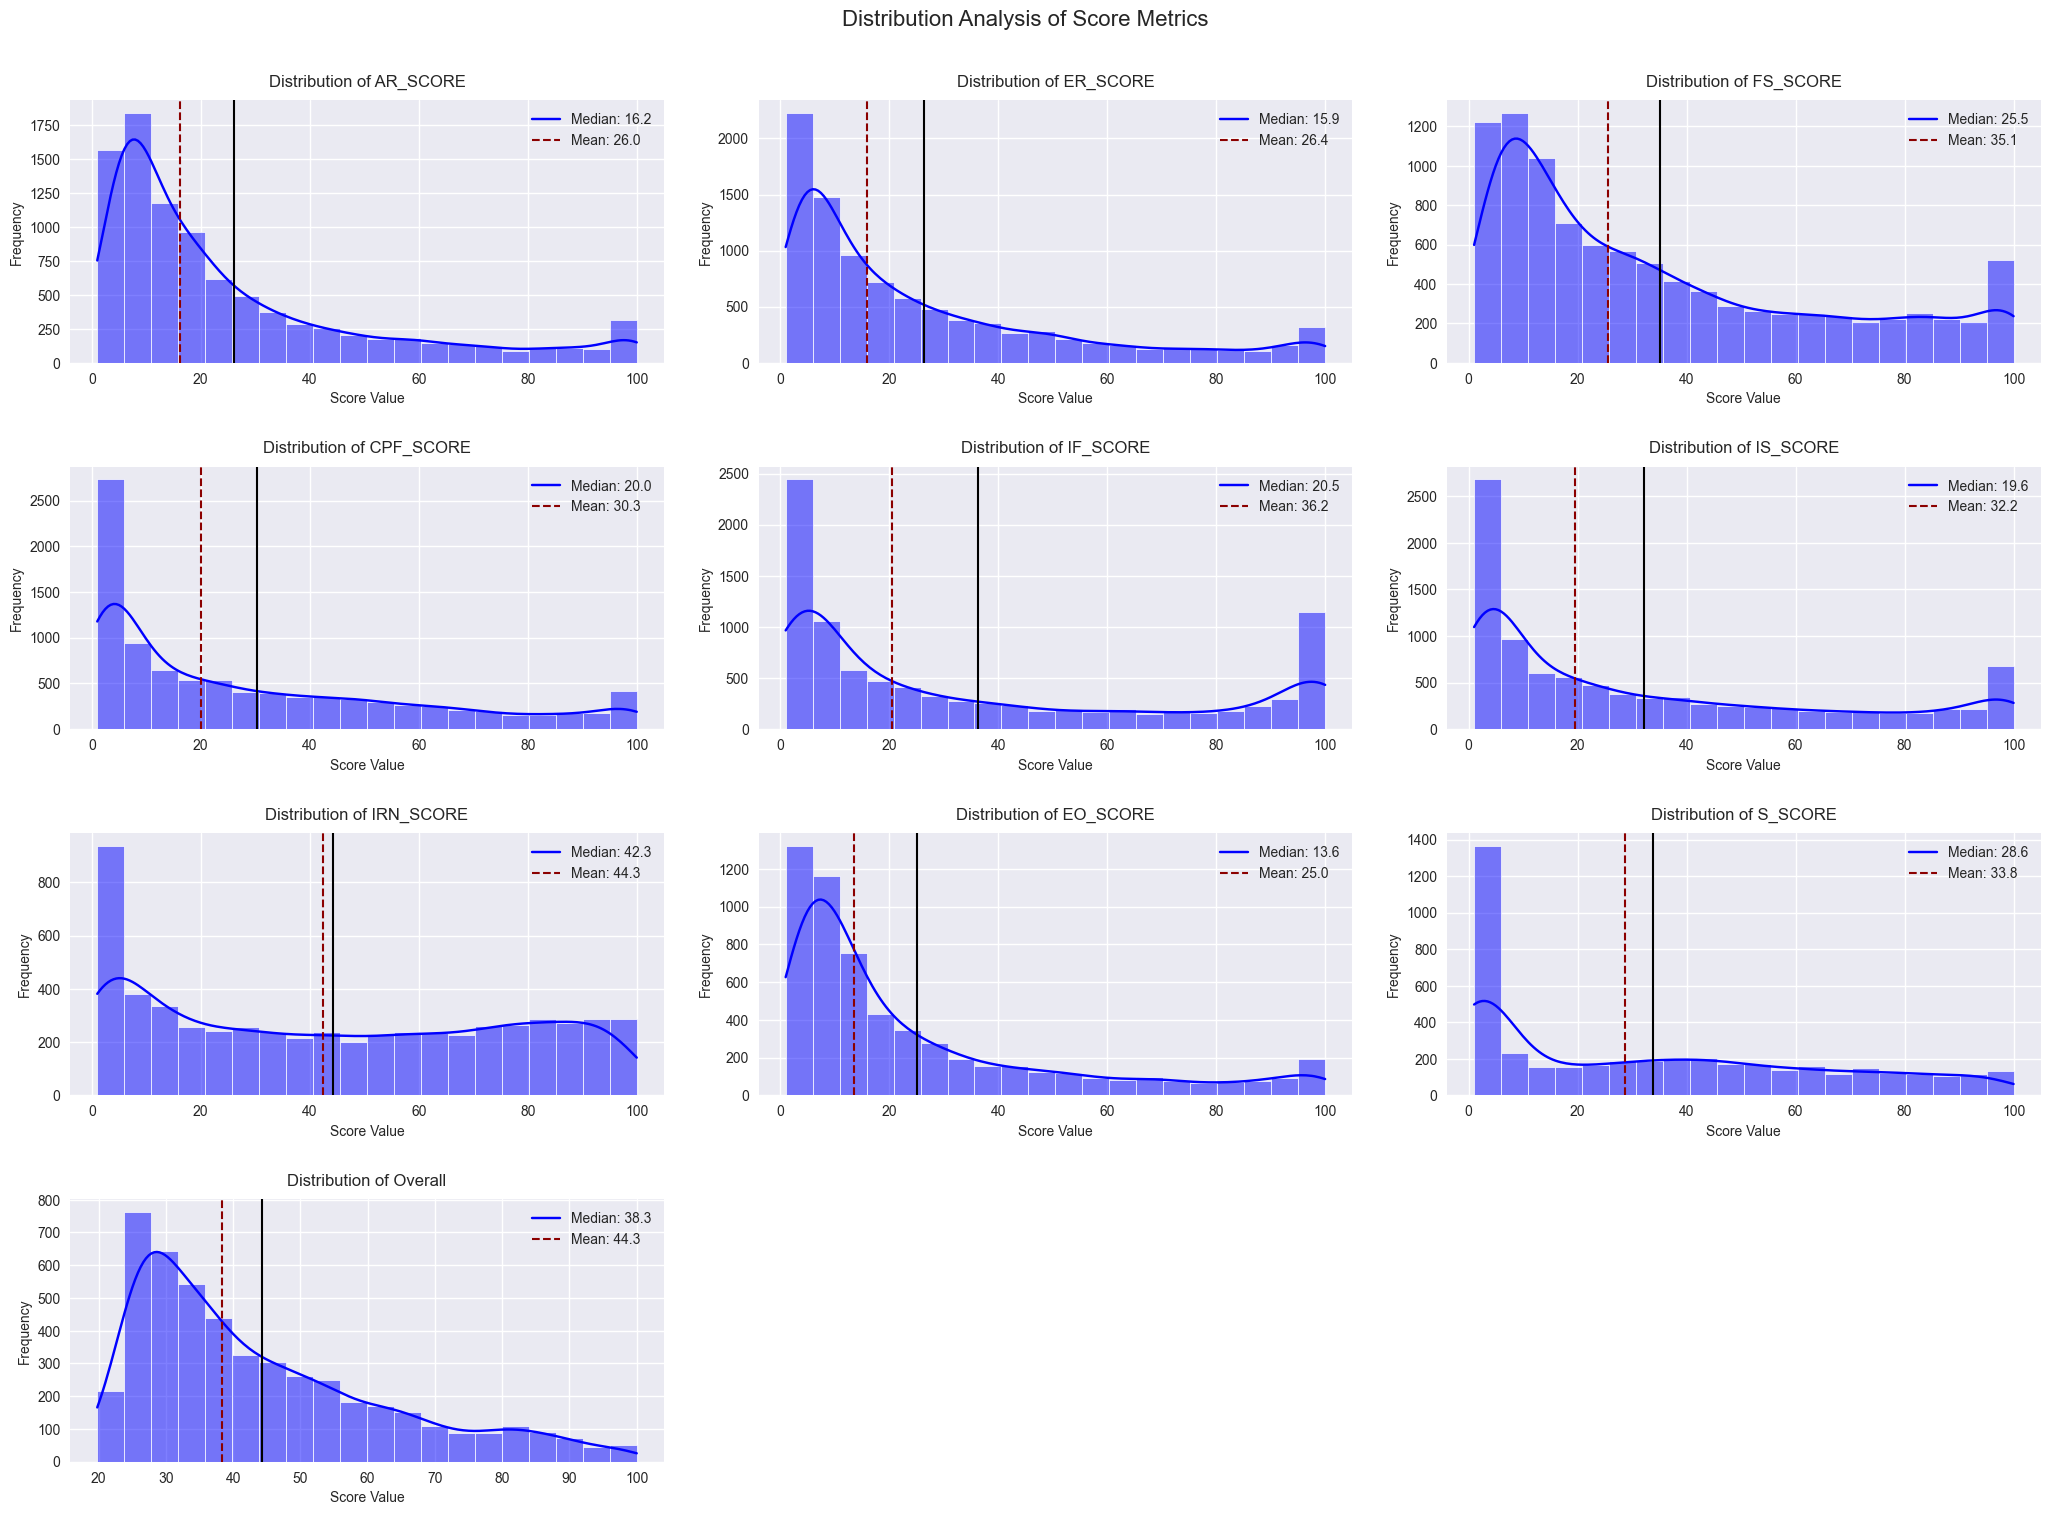

In [23]:
plt.figure(figsize=(21, 15))
plt.style.use('seaborn') 

for i, col in enumerate(score_columns, 1):
    plt.subplot(4, 3, i)
    
    sns.histplot(df[col], kde=True, bins=20, color='blue', 
                edgecolor='white', linewidth=0.5)
    
    median = df[col].median()
    mean = df[col].mean()
    plt.axvline(median, color='darkred', linestyle='--', linewidth=1.5)
    plt.axvline(mean, color='black', linestyle='-', linewidth=1.5)
    
    plt.title(f'Distribution of {col}', fontsize=12, pad=10)
    plt.xlabel('Score Value', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.legend([f'Median: {median:.1f}', f'Mean: {mean:.1f}'])

plt.tight_layout(pad=2.5)
plt.suptitle('Distribution Analysis of Score Metrics', y=1.02, fontsize=16)
plt.show()

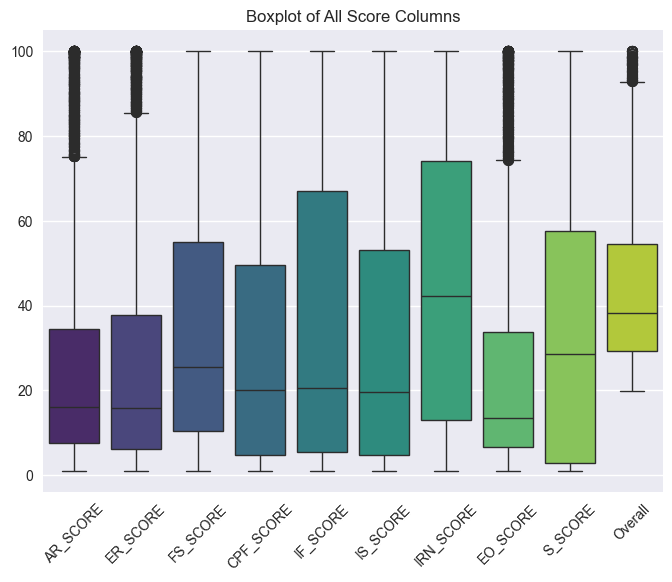

In [24]:
# Box plot comparision
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[score_columns], palette='viridis')
plt.xticks(rotation=45)
plt.title('Boxplot of All Score Columns')
plt.show()

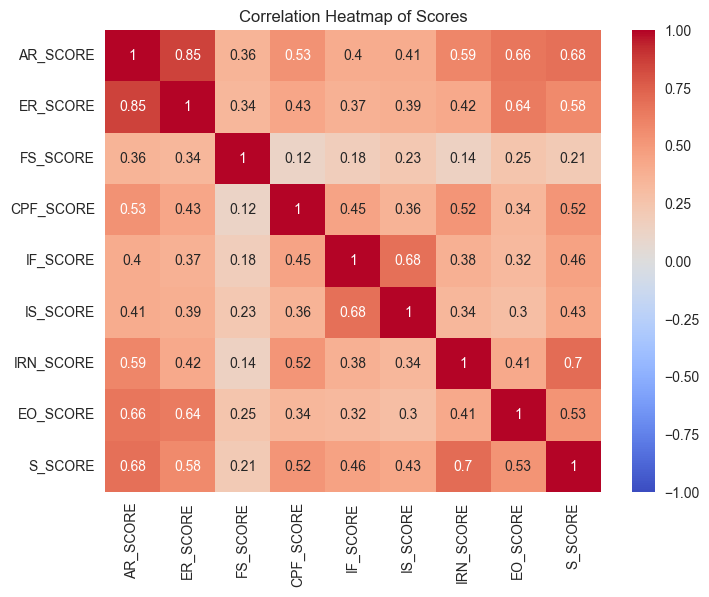

In [25]:
# Heatmap
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df[[col for col in numeric_df.columns if 'SCORE' in col or 'RANK' in col]]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Scores')
plt.show()